In [ ]:
# Abdülhalim YAYDEMİR

 
 
Dosya bilgisi :

P5 pgm formatı
width= 1024
height= 1024
maxval= 255


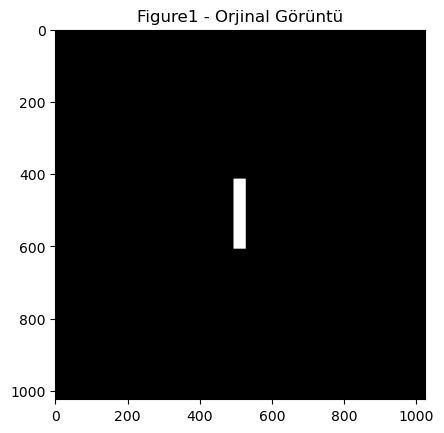

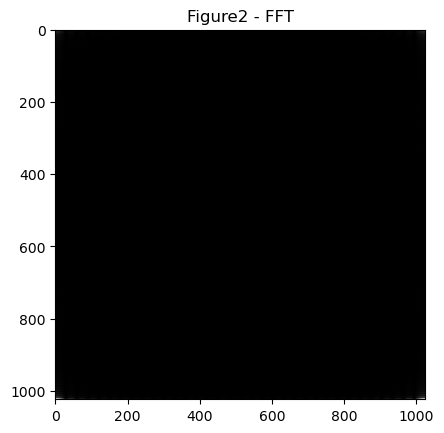

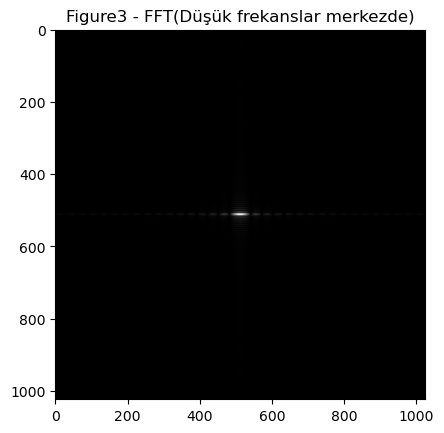

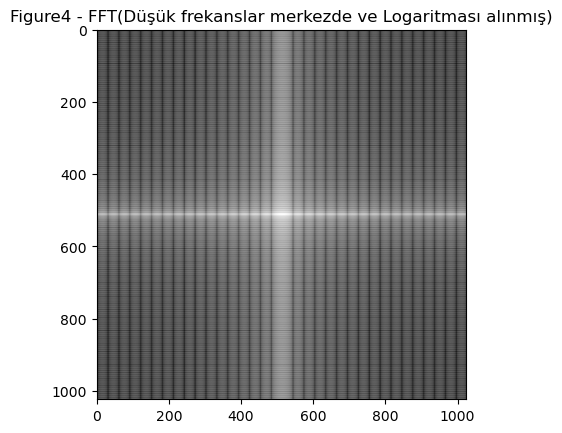

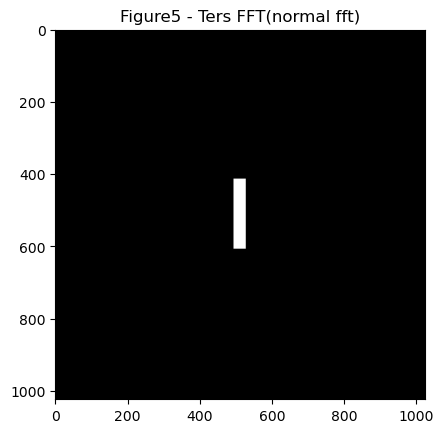

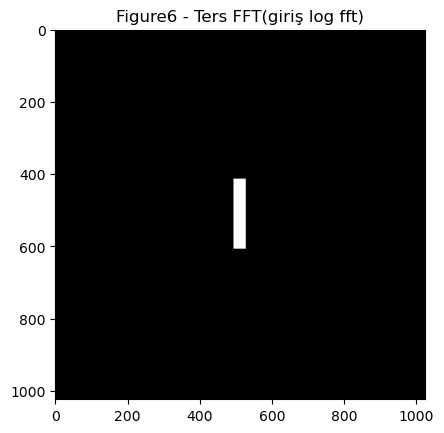

In [8]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli
from scipy import fftpack # fft işlemleri için gerekli

###########################fonksiyonlar###########################
def logaritma(f,height,width):
    c=255.0/math.log10(np.max(f)+1)
    for m in range(height):
        for n in range(width):
            f[m][n]=math.floor(c*(math.log10(float(f[m][n])+1.0)))
    return f





def logaritma_ters(f,height,width,max_value):
    c=255.0/math.log10(max_value+1)
    for m in range(height):
        for n in range(width):
            f[m][n]=math.floor((10.0**(float(f[m][n])/c))-1.0)
    return f





def my2Dfft(f,height,width):
    a=np.arange(width,dtype=complex)
    b=np.arange(height,dtype=complex)
    g=np.arange((height*width),dtype=complex).reshape((height,width))     
    g2=np.arange((height*width),dtype=complex).reshape((height,width))     
            
    for m in range(height):
        for n in range(width):
            a[n]=f[m][n]  # tek boyutta fft için her satır tek boyutlu arrayda saklandı
                
        for v in range(width):
            g[m][v]=np.fft.fft(a,width)[v] # tek boyutta fft alınıp 2 boyutlu bir arrayın satırlarına aktarıldı
            
    for n in range(width):
        for m in range(height):
            b[m]=g[m][n] # fft'si alınmış satırlardan oluşan arrayin sütunları başka bir arraya aktarıldı 
                
        for u in range(height):
            g2[u][n]=(np.fft.fft(b,height)[u]) # tek boyutta fft alınıp 2 boyutlu bir arrayın sütunlarına aktarıldı
                    
    return g2





def mypgmread(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        print('Dosya bilgisi :\n')
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print('P5 pgm formatı')  
                else:
                    print('P5 pgm formatı değil')
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                print("width=",width)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                print("height=",height)
                     
            
        # maxval değeri yazdırıldı
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
        print("maxval=",maxval)
    

        i=i+1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                i=i+1
                
        return f
    


    
    
def mypgmreadwidth(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print(" ")
                else:
                    print(" ")
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                return width
            
    
    
    
def mypgmreadheight(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print(" ")
                else:
                    print(" ")
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                return height
####################################################################

# okunacak dosya
pgm="Fig0424(a)(rectangle).pgm"

# görüntünün genişlik ve yükseklik bilgisi
width=mypgmreadwidth(pgm)
height=mypgmreadheight(pgm)

    
# piksel değerlerinin saklanacağı 2Boyutlu arraylar tanımlandı
f=np.arange(height*width).reshape((height,width))      
f2=np.arange(height*width).reshape((height,width))
g=np.arange((height*width),dtype=complex).reshape((height,width))     
g2=np.arange((height*width),dtype=complex).reshape((height,width))   
g3=np.arange((height*width),dtype=complex).reshape((height,width))   
g4=np.arange((height*width),dtype=complex).reshape((height,width))   
g5=np.arange((height*width),dtype=complex).reshape((height,width))      
phase=np.arange((height*width)).reshape((height,width))      
g6=np.arange((height*width),dtype=complex).reshape((height,width))      

    
# dosya içeriği f arrayına aktarıldı 
f=mypgmread(pgm)  

    
# düşük frekansların merkeze kaydırılması için orjinal piksellere aşağıdaki işlem uygulandı        
for m in range(height):
    for n in range(width):
        f2[m][n]=f[m][n]*((-1)**(m+n))
    

#orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure1 - Orjinal Görüntü")
plt.imshow(f,cmap='gray',vmin=0, vmax=255)        
    
    
    
    
    
# orjinal görüntünün fft'si alındı
g=my2Dfft(f,height,width)
g4=g
    
# orjinal görüntünün fft'si ekrana bastırıldı
plt.figure()
plt.title("Figure2 - FFT")
plt.imshow(np.abs(g)/(height*width),cmap='gray')  
    
    
    
    
    
    
    
# düşük frekansların merkezde olduğu fft için f2 arrayı kullanıldı
g=my2Dfft(f2,height,width)
    
# düşük frekansların merkezde olduğu fft ekrana bastırıldı
plt.figure()
plt.title("Figure3 - FFT(Düşük frekanslar merkezde)")
plt.imshow(np.abs(g)/(height*width),cmap='gray')  
    
    
    
    
    
# düşük frekansların merkezde olduğu fft logaritma işleminden geçirildi
phase=np.angle(g)
max_value=np.max(np.abs(g))
g=logaritma(np.abs(g),height,width)   
    
# düşük frekansların merkezde olduğu ve logaritması alınmış fft ekrana bastırıldı
plt.figure()
plt.title("Figure4 - FFT(Düşük frekanslar merkezde ve Logaritması alınmış)")
plt.imshow(g/(height*width),cmap='gray')  






# ters fourier almak için fft piksellerinin konjugesi alınıp my2Dfft fonksiyonuna aktarıldı
g5=np.conjugate(g4)
g5=my2Dfft(g5,height,width)
            
# ters fourier ekrana bastırıldı
plt.figure()
plt.title("Figure5 - Ters FFT(normal fft)")
plt.imshow(np.abs(g5)*(height*width),cmap='gray')  






# ters fourier almak için logaritmadan geçirilmiş fft piksellerine ters logaritma işlemi yapılıp
#ve konjugesi alınıp my2Dfft fonksiyonuna aktarıldı
g=logaritma_ters(g,height,width,max_value)

for m in range(height):
    for n in range(width):
        g6[m][n]=g[m][n]*np.exp(1j*phase[m][n])
        
g6=np.conjugate(g6)
g6=my2Dfft(g6,height,width)
            
# logaritmadan geçirilmiş fft piksellerinin ters fourieri ekrana bastırıldı
plt.figure()
plt.title("Figure6 - Ters FFT(giriş log fft)")
plt.imshow(np.abs(g6)*(height*width),cmap='gray')  
    

# Sonuç

In [1]:
# Bu ödevde görüntünün fourierini alma işlemi gerçeklenmiştir
# görüntünün her bir satırının np.fft.fft() fonksiyonuyla fourieri alınmıştır.
# daha sonra bu ortaya çıkan arrayın sütunlarının herbirinin aynı şekilde fft'si alınmıştır.
# ayrı ayrı fft  alma işlemindeki amaç zaman maliyetini en aza indirmektir. 
# ayrıca numpy kütüphanesindeki hazır fft fonksiyonu kullanarakta zaman maliyeti azaltılmış oldu.

# Figure 2'de orjinal görüntünün fft'si alındığında köşelerde beyazlıklar meydana gelmekte buralar düşük frekans noktalarıdır.
# fakat alt köşelerdeki beyazlıklar belli olsada üstteki köşelerdeki beyazlıklar ortaya çıkarılamamıştır.
# daha sonra Figure 5'de ters fourier ile orjinal görüntü tekrar elde edilmiştir.

# orjinal görüntüyü (-1)^(m+n) ile çarparak düşük frekanslar merkeze taşınmıştır.Figure 3'de görünmektedir.Fakat ödevdeki 
# dosyasındaki görüntü kadar belirgin değildir.

# daha sonra Figure 4'de bu fft logaritma işleminden geçirilerek frekanslar daha belirgin hale getirilmiştir.
# Figure 6'da bu logaritmadan geçirilen fft'nin ters fourieri alınmıştır.